# TripAdvisor Hotels cleaning + EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df = pd.read_csv('greece_hotels_data.csv')

Dropping duplicates and unnecessary rows

In [3]:
df['Hotel name'] = df['Hotel name'].drop_duplicates()
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0.1', axis=1)

In [4]:
df.head()

,Hotel name,Hotel price,Reviews count,Location rating,Cleanliness rating,Service rating,Value rating,Pool_numerical,Free_parking_numerical,free_wifi_numerical,...,safe numerical,airport numerical,taxi numerical,pets allowed numerical,private balcony numerical,ocean view numerical,spa numerical,number of restaurants,number of attractions,rating
0,Tsokas Hotel Apartments,NaN,114,4.5,4.7,4.6,4.7,1,0,0,...,0,0,0,0,0,0,0,20.0,2.0,4.5
1,Nano Suites,436.0,44,4.8,5.0,4.8,4.4,1,0,0,...,0,0,0,0,0,0,0,30.0,8.0,5.0
2,Santorini Mesotopos,449.0,306,4.3,4.5,4.4,4.2,1,0,0,...,0,0,0,0,0,0,0,23.0,6.0,4.5
3,Hotel Off,549.0,97,4.8,5.0,4.8,4.5,1,0,0,...,0,0,0,0,0,0,0,163.0,96.0,4.5
4,Lindos Breeze Beach Hotel,NaN,138,4.2,4.3,4.5,4.5,1,1,1,...,1,1,0,0,1,1,1,120.0,44.0,4.5


In the dataframe I saw that there are many hotels where the number of restaurants and attractions is NAN.
In the course we learned that if there is information that seems illogical to us, we can change its value.
Logically, there are restaurants and attractions in the area of each hotel, so I preferred to put the average value of each of them into the empty cells.

In [5]:
restaurants_mean = df['number of restaurants'].mean()

attractions_mean = df['number of attractions'].mean()

#filling the missing values with the mean value
df['number of restaurants'].fillna(restaurants_mean, inplace=True)
df['number of attractions'].fillna(attractions_mean, inplace=True)

In [6]:
#converting the type of Reviews count from string to a integer
df['Reviews count'] = pd.to_numeric(df['Reviews count'], errors='coerce')
df['Reviews count'].fillna(df['Reviews count'].mean(), inplace=True)

I tried to set a certain logic where the higher the rating, the higher the price.

In [7]:
hotel_price_mean = df['Hotel price'].mean()
#We reduced the standard deviation by half because it was very large
hotel_price_std = df['Hotel price'].std()/2

# Fill missing values based on the conditions i set
df.loc[(df['rating'] == 5.0) & df['Hotel price'].isnull(), 'Hotel price'] = hotel_price_mean + 2 * hotel_price_std
df.loc[(df['rating'] == 4.5) & df['Hotel price'].isnull(), 'Hotel price'] = hotel_price_mean + 1.5 * hotel_price_std
df.loc[(df['rating'] == 4.0) & df['Hotel price'].isnull(), 'Hotel price'] = hotel_price_mean + hotel_price_std
df.loc[(df['rating'] == 3.5) & df['Hotel price'].isnull(), 'Hotel price'] = hotel_price_mean + hotel_price_std/2
df.loc[(df['rating'] == 3.0) & df['Hotel price'].isnull(), 'Hotel price'] = hotel_price_mean + hotel_price_std/4
df.loc[(df['rating'] == 2.5) & df['Hotel price'].isnull(), 'Hotel price'] = hotel_price_mean + hotel_price_std/8

There were 3 hotels that contained data full of Nones, so I deleted them.

In [8]:
df = df.dropna()

(array([1.955e+03, 2.500e+01, 1.100e+01, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   89. ,  1987.9,  3886.8,  5785.7,  7684.6,  9583.5, 11482.4,
        13381.3, 15280.2, 17179.1, 19078. ]),
 <BarContainer object of 10 artists>)

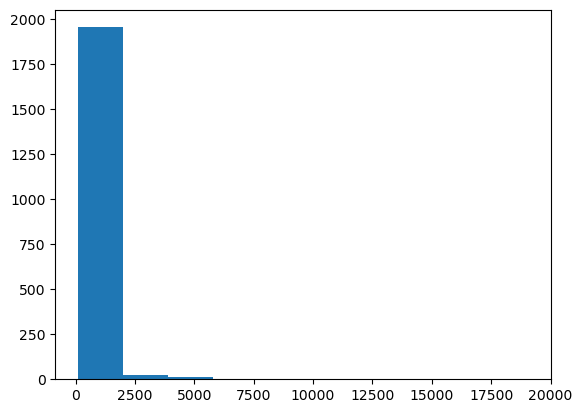

In [9]:
plt.hist(df['Hotel price'])

In the above graph you can see that the information about the prices is not balanced.
Looking at the data frame and the graph, I saw that the price of the great majority of the hotels is below 7500 and therefore I decided to delete the hotels with a higher price than that.

In [10]:
df = df[df['Hotel price'] < 7500]

We will use the pandas' info function to find out more information about the data frame and check if there are other features that need handling.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 3346
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hotel name                   1992 non-null   object 
 1   Hotel price                  1992 non-null   float64
 2   Reviews count                1992 non-null   float64
 3   Location rating              1992 non-null   float64
 4   Cleanliness rating           1992 non-null   float64
 5   Service rating               1992 non-null   float64
 6   Value rating                 1992 non-null   float64
 7   Pool_numerical               1992 non-null   int64  
 8   Free_parking_numerical       1992 non-null   int64  
 9   free_wifi_numerical          1992 non-null   int64  
 10  fitness_center_numerical     1992 non-null   int64  
 11  AC numerical                 1992 non-null   int64  
 12  minibar numerical            1992 non-null   int64  
 13  cable tv numerical

Number of restaurants and number of attractions are whole numbers, so I converted them to an int type variable.

In [12]:
df['number of restaurants'] = df['number of restaurants'].astype(int)
df['number of attractions'] = df['number of attractions'].astype(int)

Now I will show some scatterplots and histograms of the dataframe in order to draw conclusions and to check for outliers.


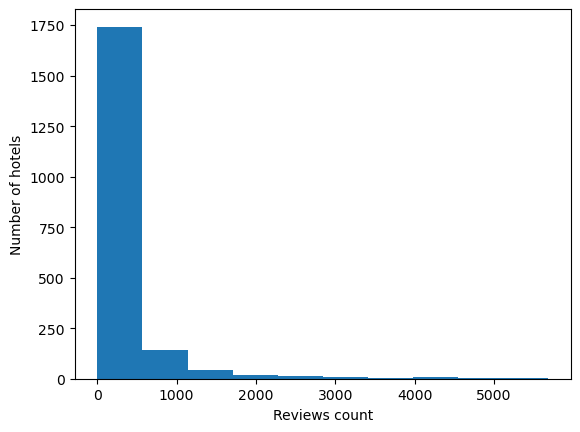

In [13]:
plt.hist(df['Reviews count'])
plt.xlabel('Reviews count')
plt.ylabel('Number of hotels')
plt.show()

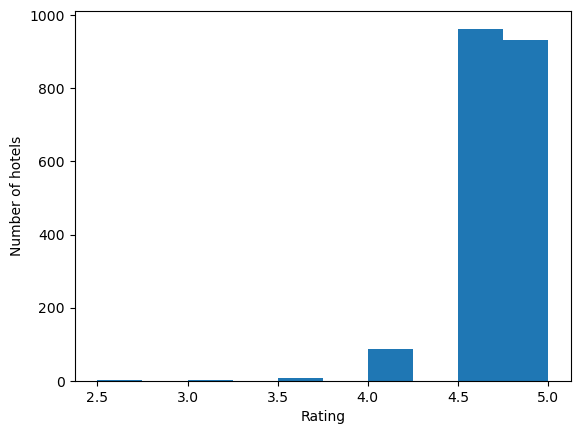

In [14]:
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of hotels')
plt.show()

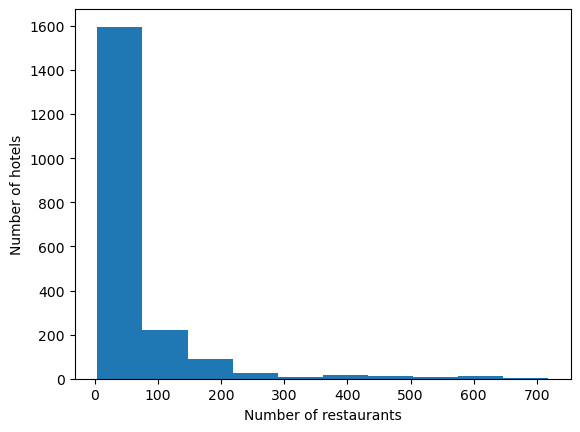

In [15]:
plt.hist(df['number of restaurants'])
plt.xlabel('Number of restaurants')
plt.ylabel('Number of hotels')
plt.show()

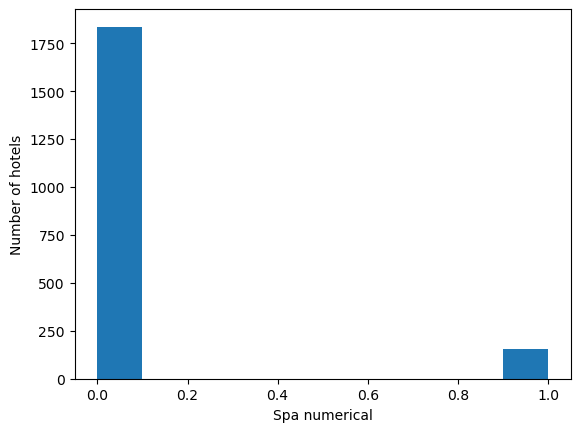

In [16]:
plt.hist(df['spa numerical'])
plt.xlabel('Spa numerical')
plt.ylabel('Number of hotels')
plt.show()

The value_counts function allows you to check the distribution of a particular column. I checked the column distribution
of Reviews count and Hotel price.


In [17]:
df['Reviews count'].value_counts()

80.0      17
91.0      15
92.0      15
118.0     14
121.0     14
          ..
1704.0     1
444.0      1
386.0      1
392.0      1
1454.0     1
Name: Reviews count, Length: 662, dtype: int64

In [18]:
df['Hotel price'].value_counts()

1969.335487    633
1662.512050    559
1355.688612     41
353.000000       8
296.000000       7
              ... 
305.000000       1
164.000000       1
228.000000       1
382.000000       1
563.000000       1
Name: Hotel price, Length: 518, dtype: int64

You can see that the most common price is slightly higher than the average, while the second and the third most common prices are more closer to it.

In [19]:
df.describe()

,Hotel price,Reviews count,Location rating,Cleanliness rating,Service rating,Value rating,Pool_numerical,Free_parking_numerical,free_wifi_numerical,fitness_center_numerical,...,safe numerical,airport numerical,taxi numerical,pets allowed numerical,private balcony numerical,ocean view numerical,spa numerical,number of restaurants,number of attractions,rating
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.0,1992.000000,1992.000000,1992.000000,...,1992.000000,1992.000000,1992.0,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,1403.971722,335.575195,4.645231,4.736596,4.722741,4.599699,1.0,0.163153,0.169177,0.076807,...,0.192771,0.129016,0.0,0.044679,0.168675,0.115462,0.078313,66.660643,21.235944,4.704819
std,713.474005,578.398624,0.286578,0.255823,0.235498,0.279322,0.0,0.369598,0.375002,0.266352,...,0.394574,0.335302,0.0,0.206649,0.374558,0.319659,0.268731,86.365740,36.651186,0.308456
min,89.000000,2.000000,2.700000,2.600000,2.700000,2.900000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.500000
25%,695.000000,92.000000,4.500000,4.600000,4.600000,4.500000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,22.750000,4.000000,4.500000
50%,1662.512050,161.000000,4.700000,4.800000,4.800000,4.600000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,43.000000,10.000000,4.500000
75%,1969.335487,314.000000,4.900000,4.900000,4.900000,4.800000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,64.000000,20.000000,5.000000
max,6131.000000,5683.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,718.000000,324.000000,5.000000


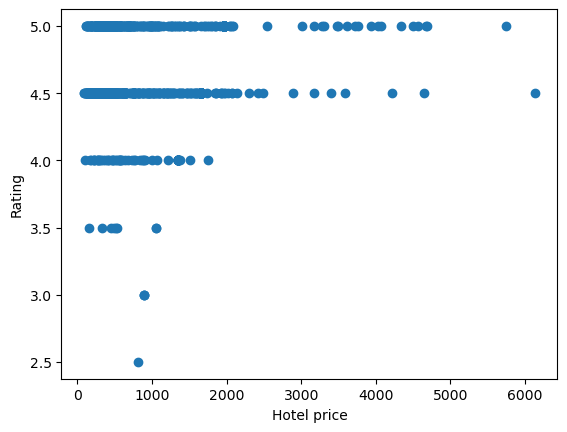

In [20]:
plt.scatter(df['Hotel price'], df['rating'])
plt.xlabel('Hotel price')
plt.ylabel('Rating')
plt.show() 


It can be concluded that a low hotel rating comes with a low hotel price
But a high rating does not necessarily come with a high price.

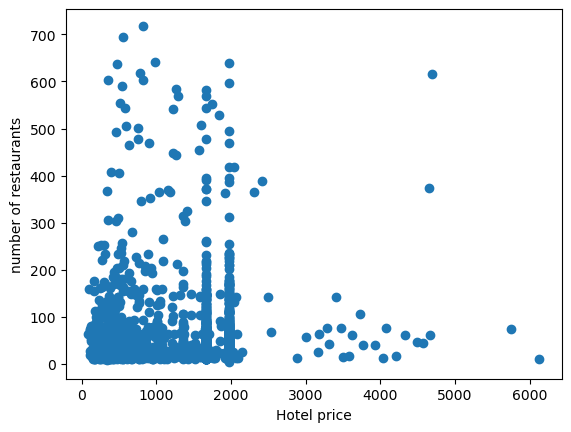

In [21]:
plt.scatter(df['Hotel price'], df['number of restaurants'])
plt.xlabel('Hotel price')
plt.ylabel('number of restaurants')
plt.show() 

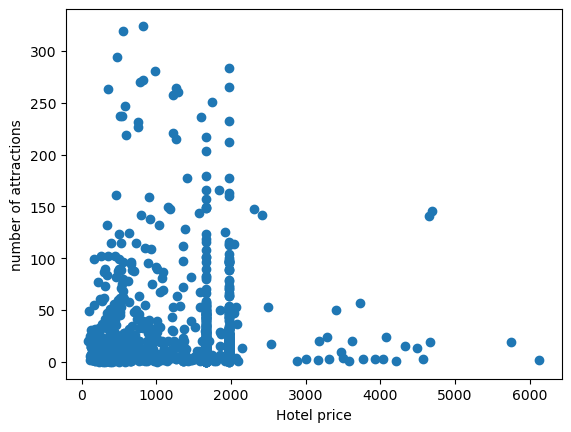

In [22]:
plt.scatter(df['Hotel price'], df['number of attractions'])
plt.xlabel('Hotel price')
plt.ylabel('number of attractions')
plt.show()

It can be concluded that the more expensive the hotel is, the more isolated it is and probably contains restaurants belonging to the hotel, and there are no restaurants nearby.
The second graph with the number of attractions strengthens my conclusion.

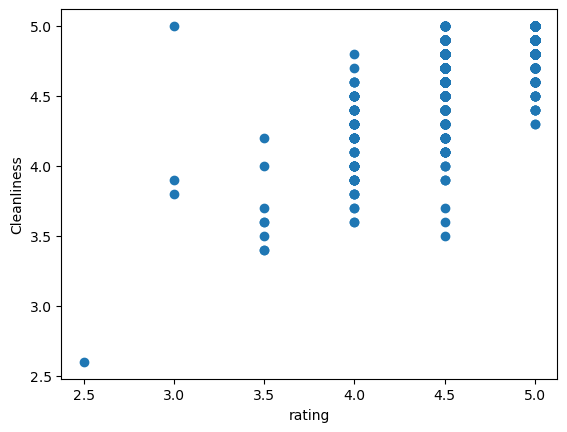

In [23]:
plt.scatter(df['rating'], df['Cleanliness rating'])
plt.xlabel('rating')
plt.ylabel('Cleanliness')
plt.show()

Although there are some records that show higher cleaniness rate for low hotel ratings, the above scatterplot confirms the claim that the higher the hotel's rating is, the more clean it would be.

Trying to find the outliers using zscore.
credit - https://www.scribbr.com/statistics/outliers/ + code taken from chat GPT

In [24]:
df['Hotel price_zscore'] = zscore(df['Hotel price'])

df['Reviews count_zscore'] = zscore(df['Reviews count'])

threshold = 3

outliers_hotel_price = df[df['Hotel price_zscore'].abs()>threshold]
outliers_reviews_count = df[df['Reviews count_zscore'].abs()>threshold]

In [25]:
df = df.drop(['Hotel price_zscore', 'Reviews count_zscore'], axis=1)


The columns I'm trying to calculate the outliers for are hotel price and reviews count columns.
Below you can see the rows that came out as outliers, and finally I'm dropping those rows.

In [26]:
outliers_hotel_price

,Hotel name,Hotel price,Reviews count,Location rating,Cleanliness rating,Service rating,Value rating,Pool_numerical,Free_parking_numerical,free_wifi_numerical,...,taxi numerical,pets allowed numerical,private balcony numerical,ocean view numerical,spa numerical,number of restaurants,number of attractions,rating,Hotel price_zscore,Reviews count_zscore
1167,M Mykonos Villas,4033.0,81.000000,5.0,5.0,5.0,4.9,1,0,0,...,0,0,0,0,0,13,3,5.0,3.685752,-0.440248
1271,Kivotos Santorini,4569.0,56.000000,5.0,5.0,5.0,4.6,1,0,0,...,0,0,0,0,0,44,3,5.0,4.437195,-0.483482
1864,"Hotel Grande Bretagne, A Luxury Collection Hotel",4652.0,4469.000000,4.9,4.8,4.6,4.2,1,0,0,...,0,0,0,0,0,374,141,4.5,4.553556,7.148120
1866,Astra Suites,3762.0,1933.000000,4.9,4.9,4.9,4.6,1,0,1,...,0,1,1,1,1,39,3,5.0,3.305825,2.762500
1873,Hotel Tagoo,3725.0,1472.000000,4.7,4.9,4.9,4.8,1,0,1,...,0,0,1,1,0,105,57,5.0,3.253953,1.965271
1874,Andronis Luxury Suites,5745.0,261.893744,5.0,4.9,4.9,4.6,1,0,1,...,0,0,1,1,1,74,19,5.0,6.085882,-0.127421
1897,Celestia Grand,4688.0,513.000000,4.8,5.0,5.0,4.7,1,0,0,...,0,0,0,0,0,616,146,5.0,4.604026,0.306829
1904,Charisma Suites,4671.0,388.000000,4.9,5.0,5.0,4.8,1,0,1,...,0,0,1,1,1,61,19,5.0,4.580193,0.090661
1907,Iconic Santorini - A Boutique Cave Hotel,3933.0,449.000000,5.0,5.0,5.0,4.7,1,0,1,...,0,0,1,1,1,40,3,5.0,3.545558,0.196151
1928,Canaves Oia Sunday Suites,4076.0,173.000000,5.0,5.0,5.0,5.0,1,0,0,...,0,0,0,0,0,76,24,5.0,3.746036,-0.281149


In [27]:
outliers_reviews_count

,Hotel name,Hotel price,Reviews count,Location rating,Cleanliness rating,Service rating,Value rating,Pool_numerical,Free_parking_numerical,free_wifi_numerical,...,taxi numerical,pets allowed numerical,private balcony numerical,ocean view numerical,spa numerical,number of restaurants,number of attractions,rating,Hotel price_zscore,Reviews count_zscore
158,Blue Lagoon Resort,770.00000,4218.0,3.9,4.6,4.3,4.0,1,0,0,...,0,0,0,0,0,64,20,4.0,-0.888793,6.714054
542,Titania Hotel,526.00000,2286.0,4.2,3.7,3.7,3.4,1,0,0,...,0,0,0,0,0,247,71,3.5,-1.230868,3.372958
1143,Stella Palace Resort & Spa,1252.00000,3166.0,4.0,4.5,4.5,4.3,1,1,0,...,0,0,1,1,1,25,13,4.5,-0.213056,4.894783
1171,Lindos Imperial Resort & Spa,1213.00000,4049.0,3.9,4.2,4.2,4.0,1,0,0,...,0,0,0,0,0,120,43,4.0,-0.267732,6.421795
1172,Tui Blue Elounda Village by AQUILA,1091.00000,2825.0,4.3,4.6,4.6,4.2,1,1,0,...,0,0,1,1,1,266,87,4.5,-0.438769,4.305076
1176,Aldemar Olympian Village,1662.51205,2661.0,4.4,4.3,4.4,4.0,1,0,0,...,0,0,0,0,0,64,20,4.5,0.362459,4.021463
1231,Club Med Gregolimano - Greece,1644.00000,5652.0,4.7,4.5,4.5,4.0,1,1,1,...,0,0,1,1,0,64,20,4.5,0.336506,9.193936
1233,Porto Carras Grand Resort,1662.51205,2555.0,4.8,4.3,4.2,4.0,1,1,0,...,0,0,1,1,1,64,20,4.5,0.362459,3.838152
1320,Labranda Blue Bay Resort,577.00000,3008.0,3.9,4.2,4.2,4.0,1,1,0,...,0,0,1,1,1,14,0,4.0,-1.159369,4.621546
1861,Atrium Prestige Thalasso Spa Resort & Villas,741.00000,3272.0,4.5,4.8,4.8,4.6,1,1,1,...,0,0,1,1,1,64,20,5.0,-0.929450,5.078093


I check the indexes of the rows that I want to delete, and the sign ~ indicates that I want all the rows except these rows.

In [28]:
mask = df.index.isin(outliers_hotel_price.index) | df.index.isin(outliers_reviews_count.index)
df = df[~mask]

Now after calculation, we removed the outliers from the data frame as you can see below.

In [29]:
new_columns = ['Hotel name', 'Hotel price', 'Reviews count', 'Location rating',
       'Cleanliness rating', 'Service rating', 'Value rating','number of restaurants', 'number of attractions', 'rating']
subset_df = df[new_columns]

subset_df.describe()

,Hotel price,Reviews count,Location rating,Cleanliness rating,Service rating,Value rating,number of restaurants,number of attractions,rating
count,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000
mean,1385.711511,263.206253,4.649586,4.740228,4.726370,4.607704,65.118407,20.634953,4.709152
std,662.487742,303.943375,0.283149,0.254388,0.233415,0.275369,82.358841,35.251871,0.306549
min,89.000000,2.000000,2.700000,2.600000,2.700000,2.900000,4.000000,0.000000,2.500000
25%,667.000000,92.000000,4.500000,4.600000,4.600000,4.500000,23.000000,4.000000,4.500000
50%,1662.512050,157.000000,4.700000,4.800000,4.800000,4.700000,42.500000,10.000000,4.500000
75%,1969.335487,296.000000,4.900000,4.900000,4.900000,4.800000,64.000000,20.000000,5.000000
max,3498.000000,2038.000000,5.000000,5.000000,5.000000,5.000000,718.000000,324.000000,5.000000


Now I will present the correlation between some of the variables in a more graphical way

<AxesSubplot:>

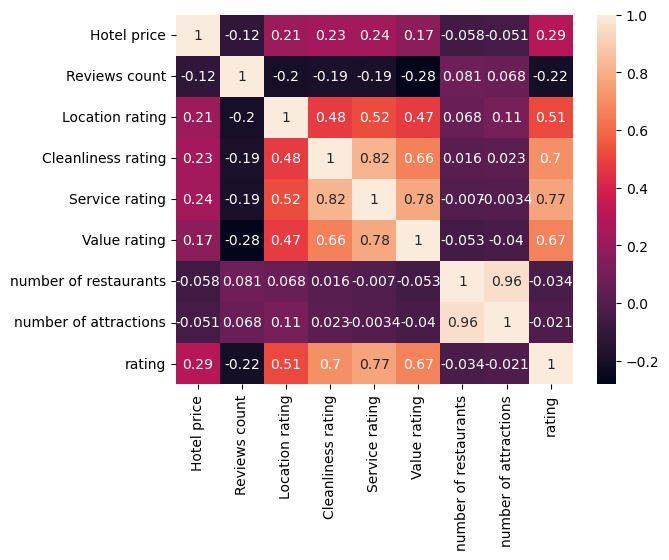

In [30]:
#Calculate the correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, annot=True)

We can conclude that as the hotel's rating araises, also the sub ratings arise, which is quite logical.


Exporting the processed data frame into a csv file.

In [31]:
df.to_csv('finished_data.csv')